In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [94]:
fandago = pd.read_csv('C:/Users/eli/Desktop/fandango_scrape.csv')
fandago.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [18]:
fandago.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES'], dtype='object')

In [210]:
fandago.shape

(504, 5)

In [211]:
fandago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FILM        504 non-null    object 
 1   STARS       504 non-null    float64
 2   RATING      504 non-null    float64
 3   VOTES       504 non-null    int64  
 4   STARS_DIFF  504 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.8+ KB


In [21]:
fandago.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Text(0.5, 1.0, 'Rating vs Votes')

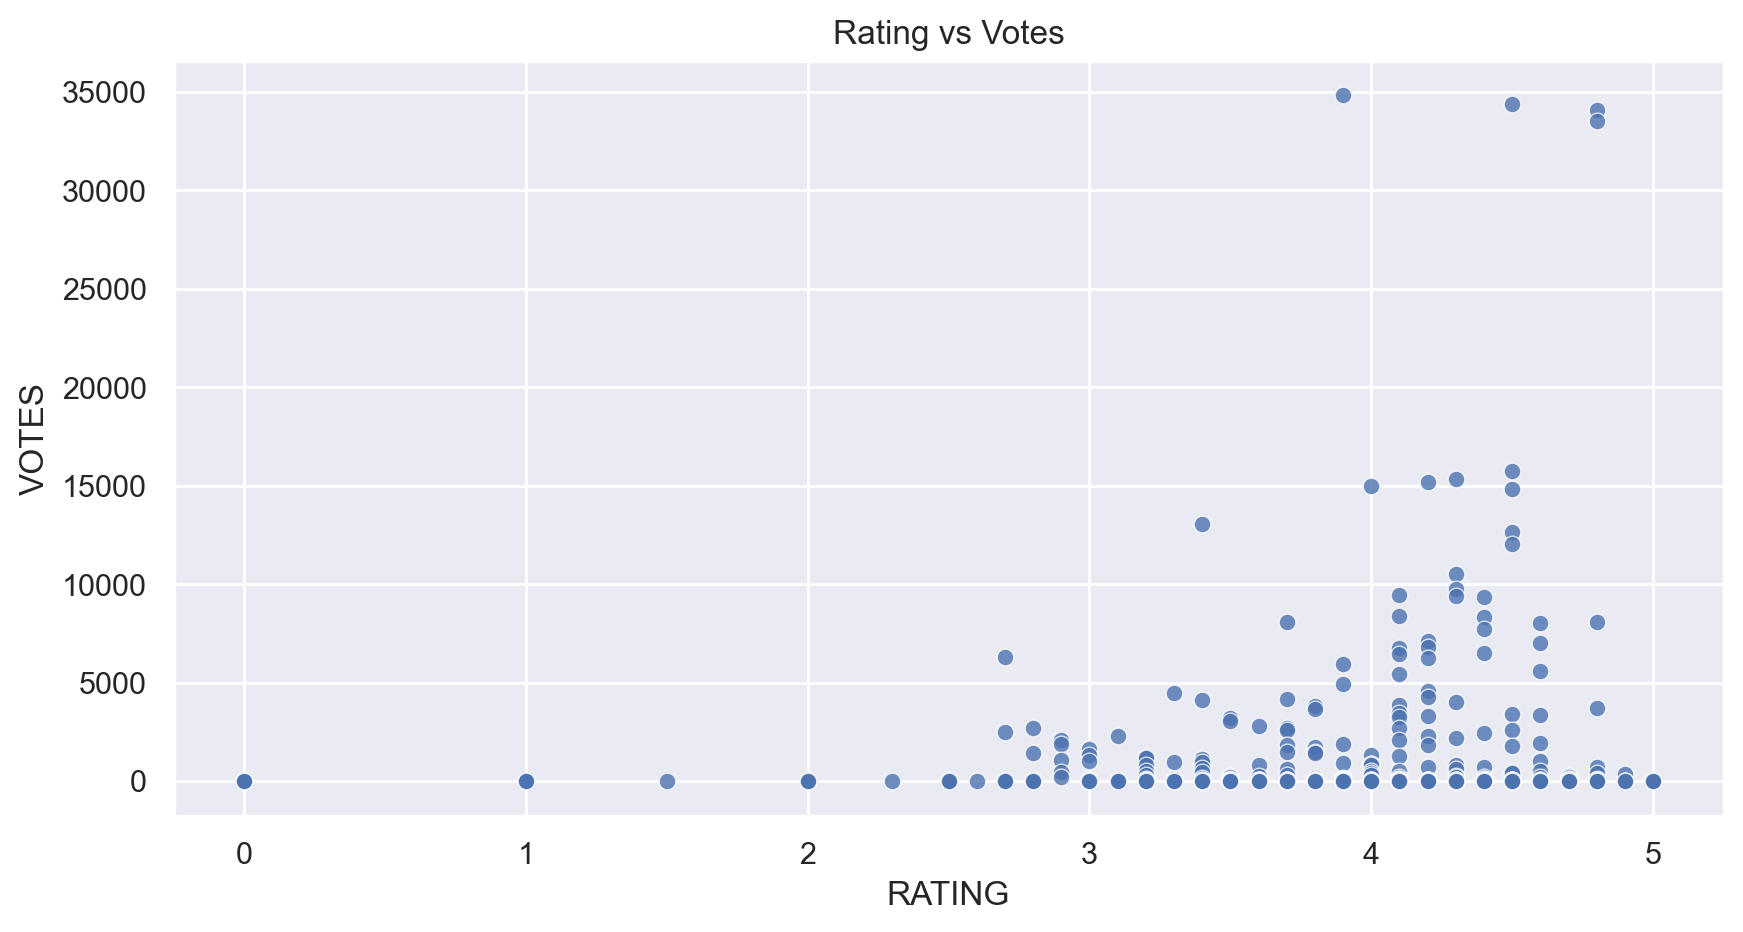

In [35]:
''' Can we trust online reviews and ratings? Especially if the same company showing the rating and 
also make money by selling movie tickets.
Let's explore the relationship between popularity of the film and its rating.
Scatter plot showing the relationship between rating and votes. '''

plt.figure(figsize=(10,5), dpi = 200)
sns.set(style='darkgrid')
sns.scatterplot(data = fandago, x = 'RATING', y = 'VOTES', alpha=0.8)
plt.title("Rating vs Votes")

<Figure size 720x360 with 0 Axes>

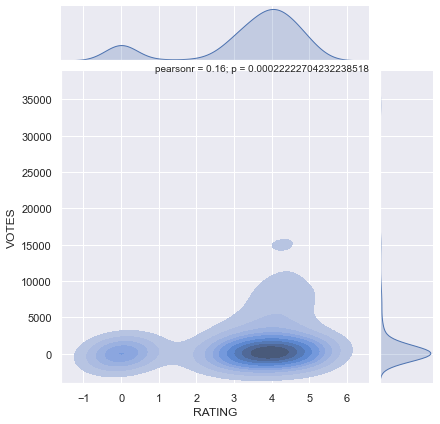

In [201]:
'''Find the correlation between votes and rating. '''
jg = sns.jointplot(x='RATING', y='VOTES', data=fandago, kind='kde', fill=True)
 
# To get the correlation, we need to consider only the records with NA values for either measurement.
df_no_nulls = fandago[['RATING', 'VOTES']].dropna()
pearsonr, p = stats.pearsonr(df_no_nulls.RATING, df_no_nulls.VOTES)
pearson_str = f'pearsonr = {pearsonr:.2f}; p = {p}'
 
# Placing the annotation somewhere readable requires that we find the max of the axes
jg.ax_joint.text(
    jg.ax_joint._axes.xaxis.get_data_interval()[1], 
    jg.ax_joint._axes.yaxis.get_data_interval()[1], 
    pearson_str, 
    horizontalalignment='right')

plt.show()

In [41]:
''' Calculate the correlation between the columns.'''
df_no_nulls = fandago[['STARS','RATING', 'VOTES']].dropna()
corr_matrix = df_no_nulls.corr().abs()
corr_matrix

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [62]:
''' Create a new column that is able to strip the year from the title strings and
set this new column as YEAR.'''
fandago['YEAR'] =[x.split()[-1].replace( '(', "" ) for x in fandago['FILM']]
fandago['YEAR'] =[int(x.replace( ')', "" )) for x in fandago['YEAR']]
fandago['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: int64

In [106]:
''' How many movies are in the Fandago DataFrame per year?'''
fandago['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

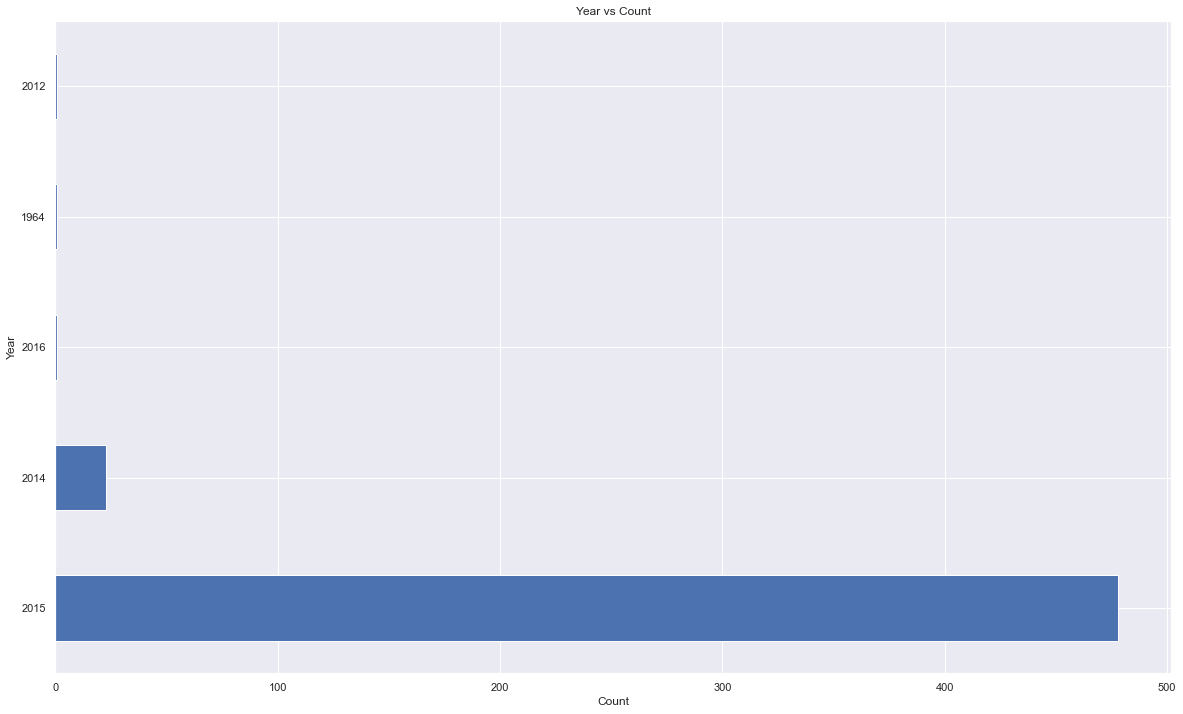

In [117]:
plt.figure(figsize=(20,12))
fandago['YEAR'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Year')
plt.title("Year vs Count")
plt.show()

In [147]:
''' What are the 10 movies with the highest number of votes?'''
sort_movies = fandago.sort_values(by=['VOTES'], ascending=False).iloc[:10,]
sort_movies

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337
6,Kingsman: The Secret Service (2015),4.5,4.2,15205
7,Minions (2015),4.0,4.0,14998
8,Avengers: Age of Ultron (2015),5.0,4.5,14846
9,Into the Woods (2014),3.5,3.4,13055


In [129]:
''' How many movies have zero votes?'''
condition = fandago['VOTES'] == 0
movies_zero_votes = fandago[condition]
print(len(movies_zero_votes))
movies_zero_votes.head()

69


,FILM,STARS,RATING,VOTES
435,6 Years (2015),0.0,0.0,0
436,7 Minutes (2015),0.0,0.0,0
437,A Year in Champagne (2015),0.0,0.0,0
438,Balls Out (2015),0.0,0.0,0
439,Before I Wake (2015),0.0,0.0,0


In [214]:
''' Create DataFrame of only reviewed films by removing any films that have zero votes.'''
condition = fandago['VOTES'] > 0
df_non_zero = fandago[condition]
df_non_zero

,FILM,STARS,RATING,VOTES,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1
1,Jurassic World (2015),4.5,4.5,34390,0.0
2,American Sniper (2015),5.0,4.8,34085,0.2
3,Furious 7 (2015),5.0,4.8,33538,0.2
4,Inside Out (2015),4.5,4.5,15749,0.0
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,0.0
431,The Intern (2015),5.0,5.0,1,0.0
432,The Park Bench (2015),5.0,5.0,1,0.0
433,The Wanted 18 (2015),5.0,5.0,1,0.0


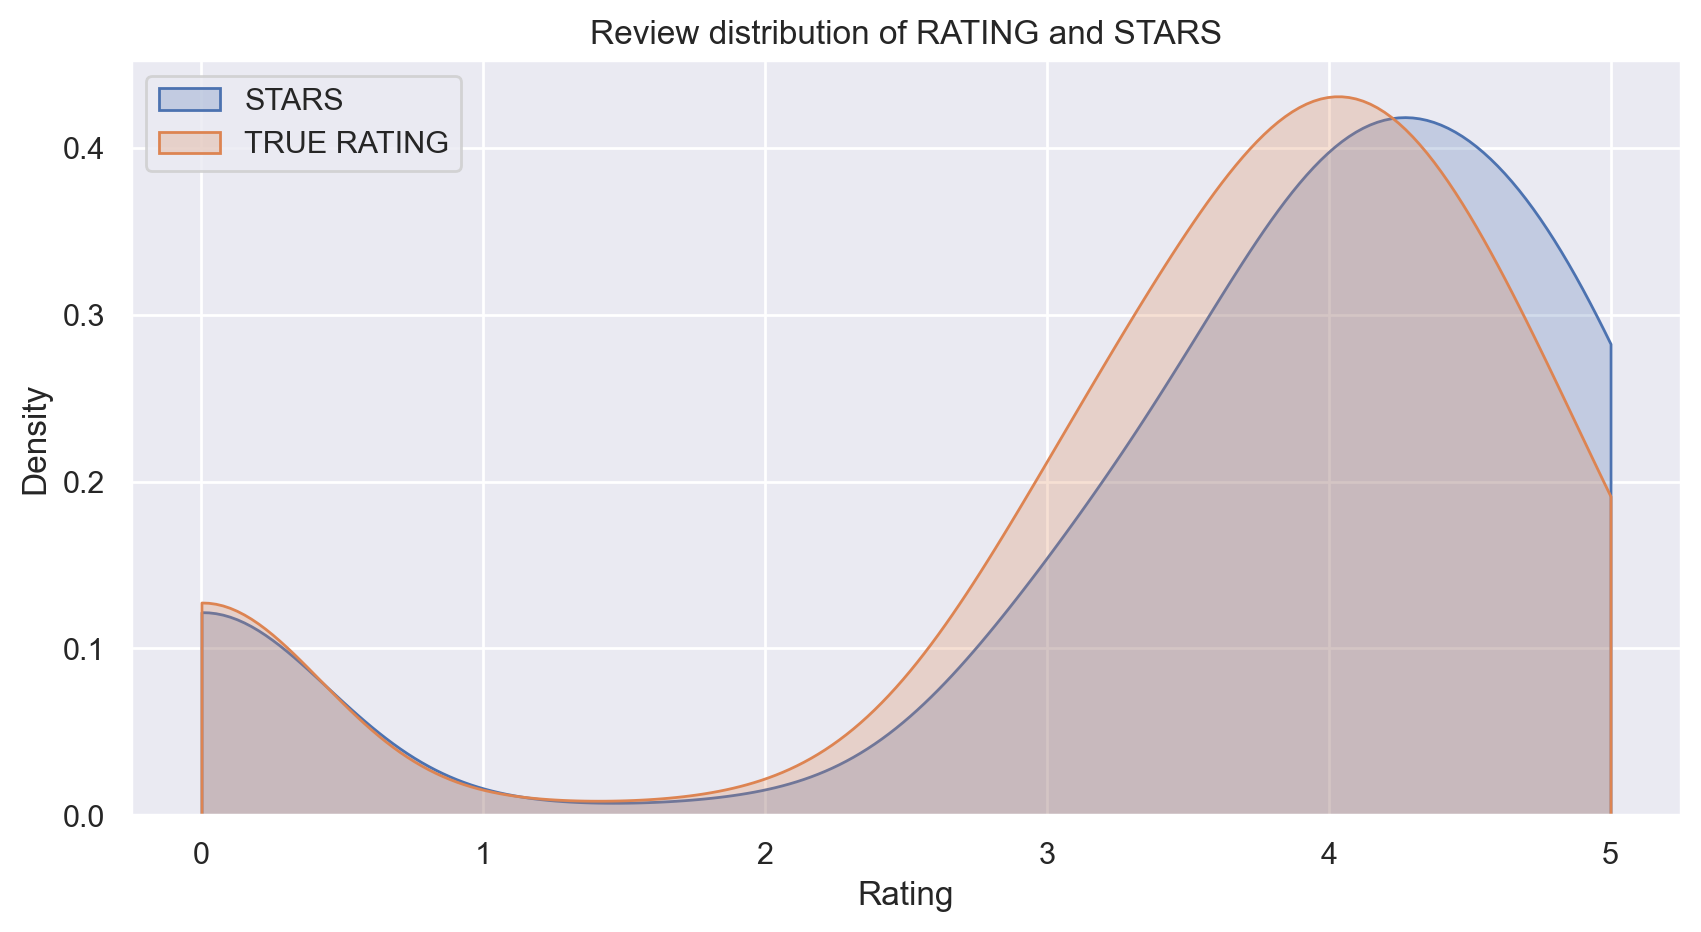

In [224]:
''' Create a KDE plot that displays the distribution of ratings that are displayed (STARS) VS what the true
rating was from votes(RATING).'''
plt.figure(figsize=(10,5), dpi = 200)
sns.kdeplot(
    data = fandago,
    x = 'STARS',
    label = 'STARS',
    clip = [0,5],
    fill = True
)

sns.kdeplot(
    data = fandago,
    x = 'RATING',
    label = 'TRUE RATING',
    clip = [0,5],
    fill = True
)

plt.title('Review distribution of RATING and STARS')
plt.xlabel('Rating')
plt.legend(loc = 'upper left')
plt.show()

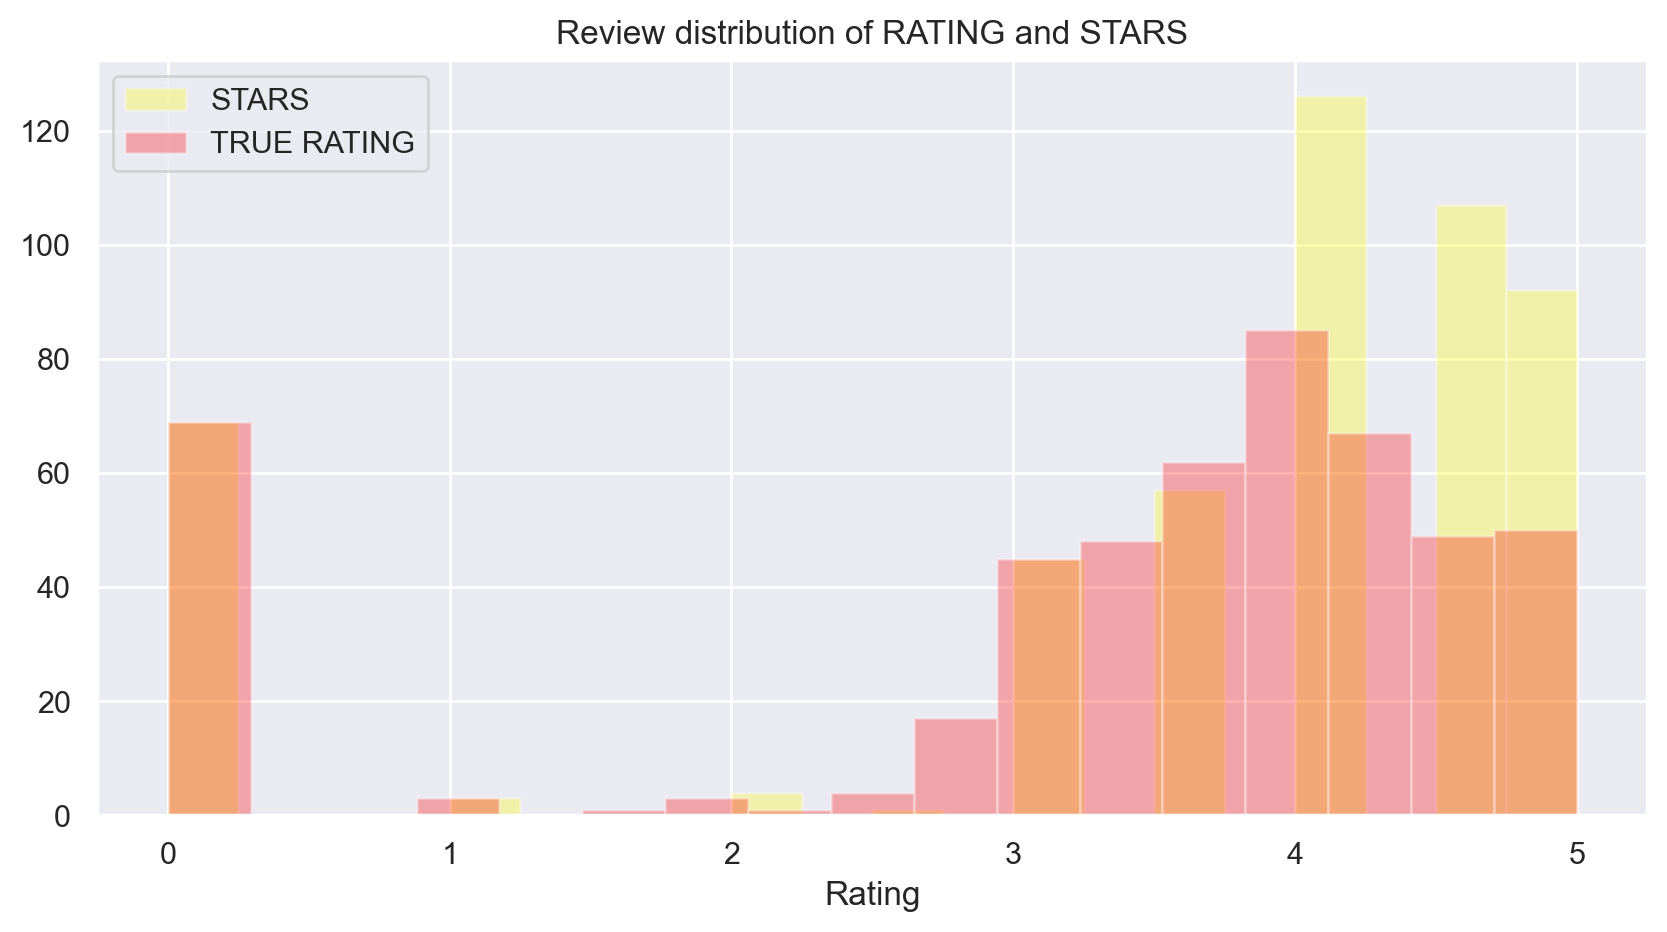

In [225]:
''' Represent above difference with hist plot.'''
plt.figure(figsize=(10,5), dpi = 200)
plt.hist(
    fandago['STARS'],
    alpha = 0.3,
    color = 'yellow',
    label = 'STARS',
    bins = 'auto'
)

plt.hist(
    fandago['RATING'],
    alpha = 0.3,
    color = 'red',
    label = 'TRUE RATING',
    bins = 'auto'
)

plt.title('Review distribution of RATING and STARS')
plt.xlabel('Rating')
plt.legend(loc = 'best')

plt.show()

In [194]:
''' Create a new column 'STARS_DIFF' that shows the difference between STARS and TRUE RATING. '''
fandago['STARS_DIFF'] = fandago['STARS'] - fandago['RATING']
fandago.head()

,FILM,STARS,RATING,VOTES,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1
1,Jurassic World (2015),4.5,4.5,34390,0.0
2,American Sniper (2015),5.0,4.8,34085,0.2
3,Furious 7 (2015),5.0,4.8,33538,0.2
4,Inside Out (2015),4.5,4.5,15749,0.0


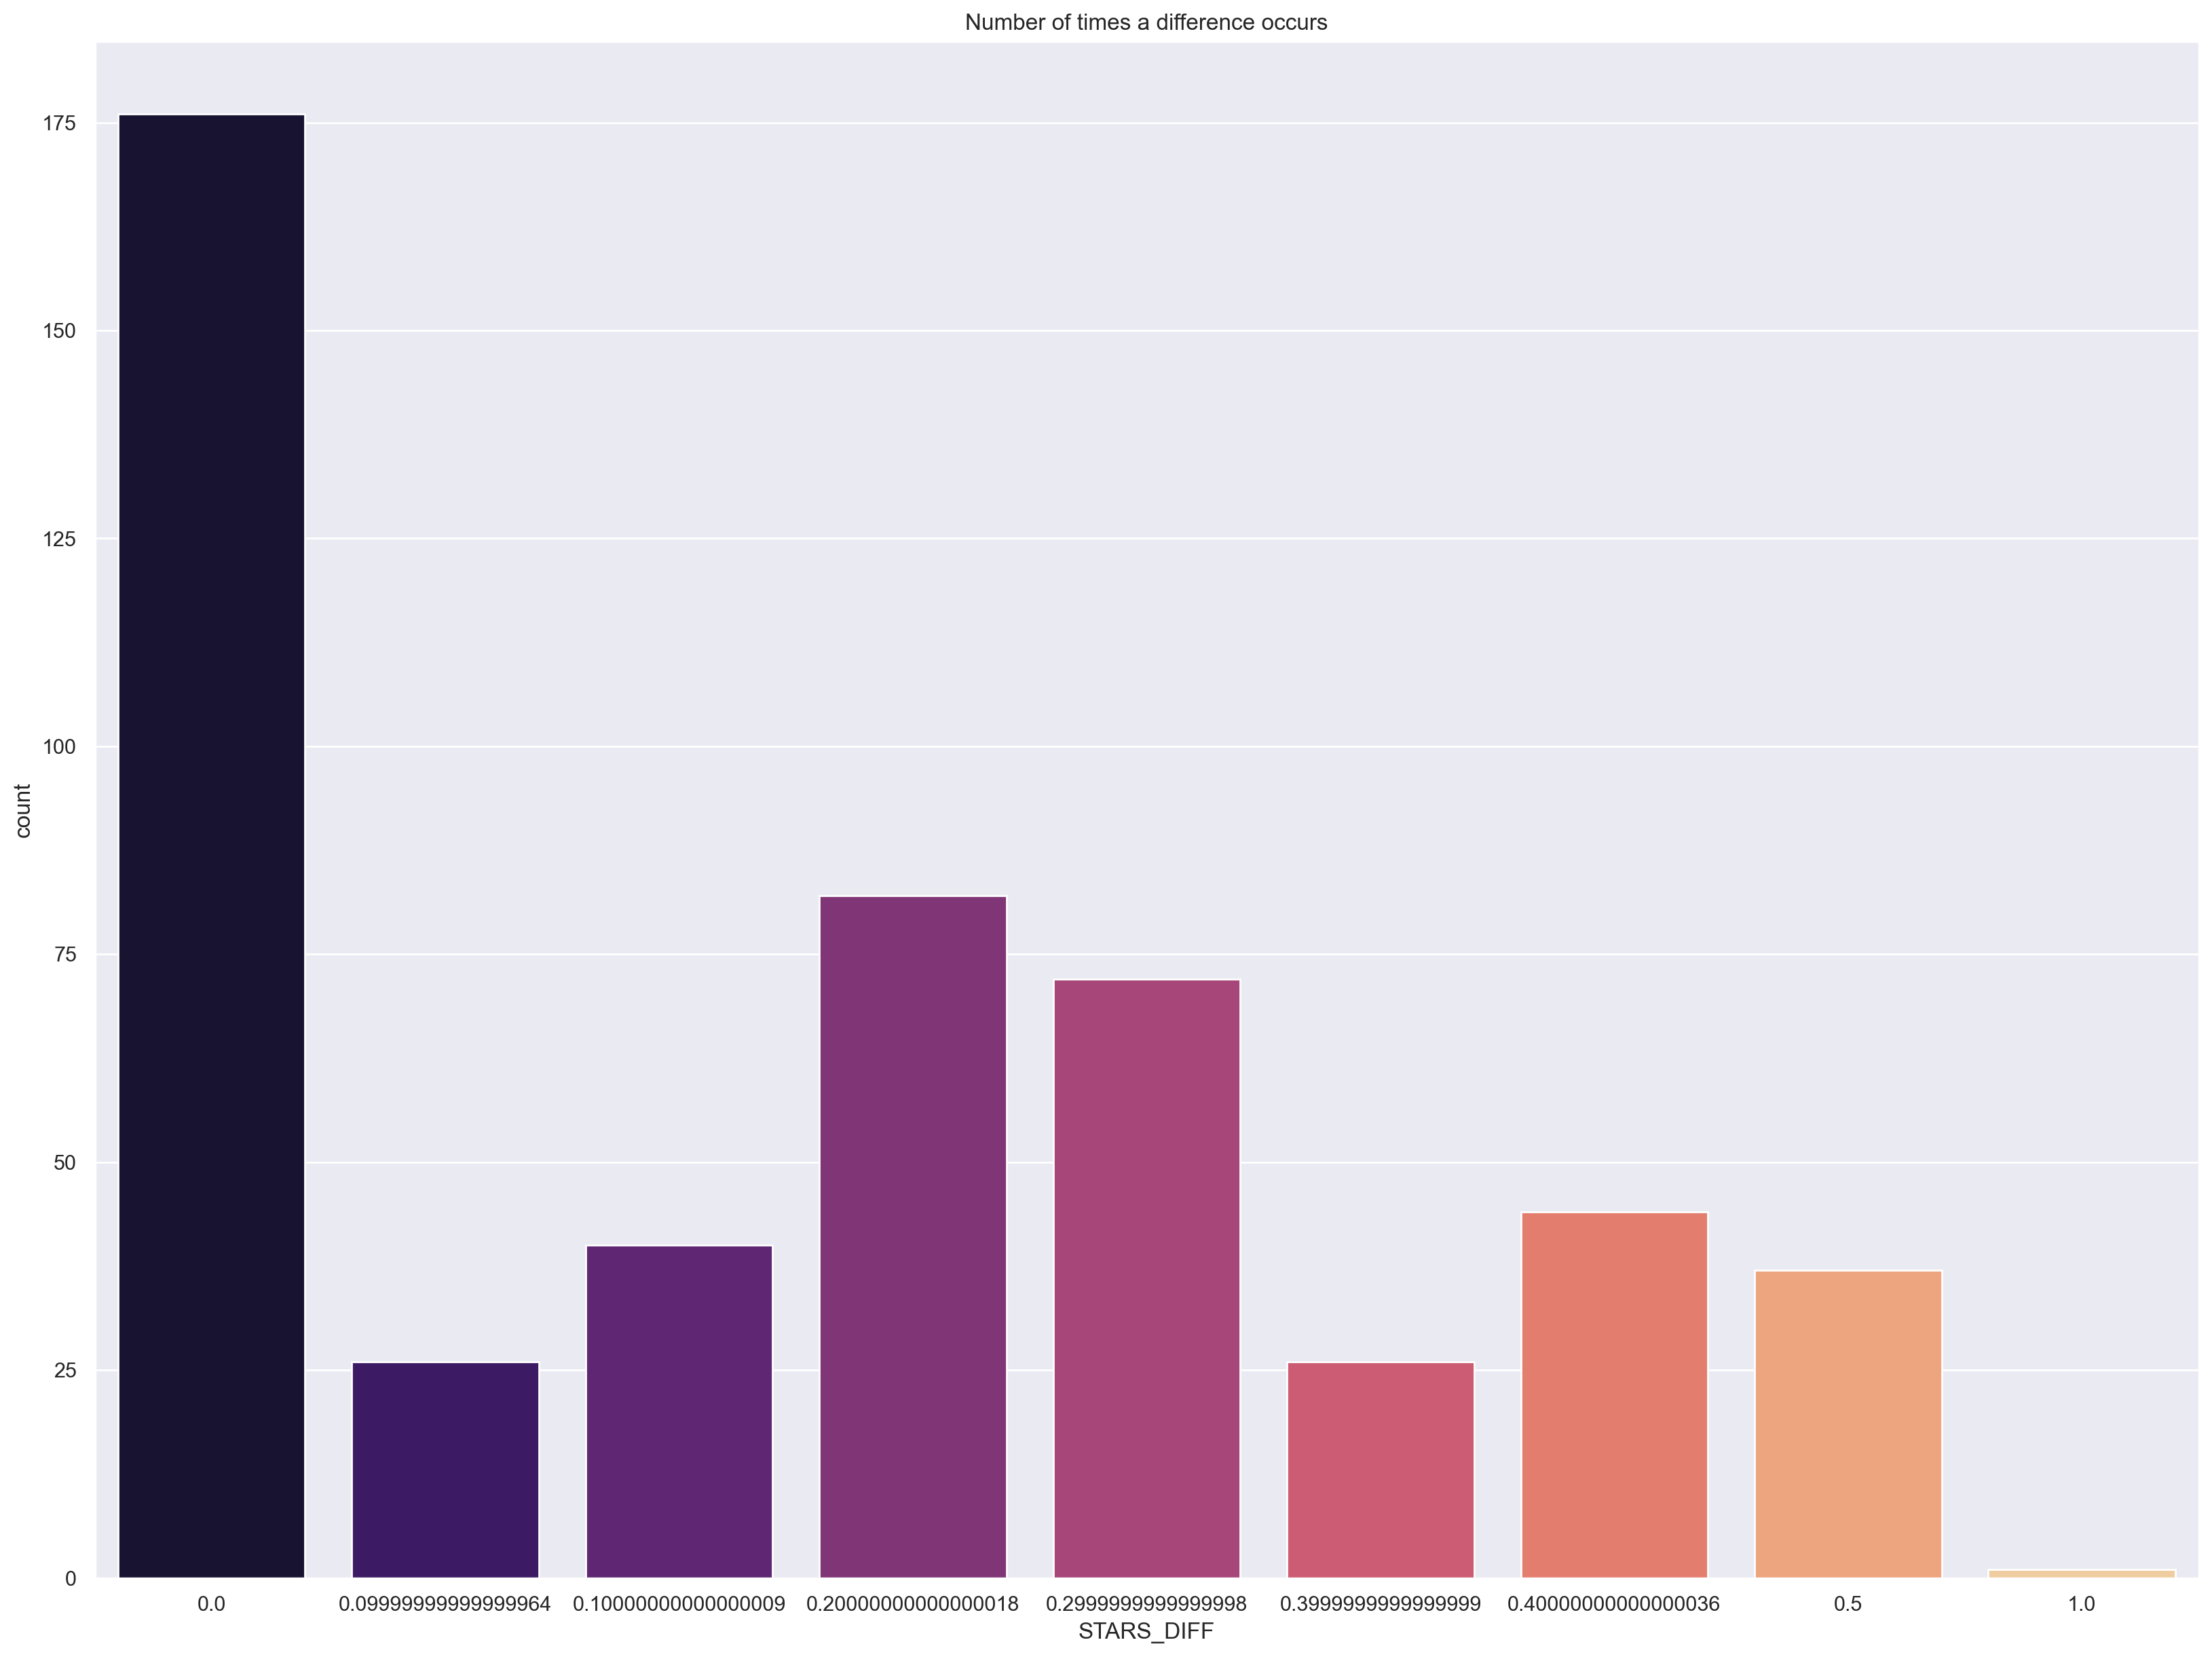

In [233]:
''' Create a count plot to display the number of times a certain difference occurs.'''
plt.figure(figsize=(20,15), dpi = 200)
sns.countplot(data = fandago, x = 'STARS_DIFF', palette = 'magma' )
plt.title('Number of times a difference occurs')
plt.show()

In [207]:
''' We can see from the plot that one movie was displaying over a 1 star difference that its true
rating! What movie had this close to 1 star difference?'''
condition = fandago['STARS_DIFF'] == 1
movie_one_diff = fandago.loc[condition]
movie_one_diff

,FILM,STARS,RATING,VOTES,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,1.0


In [18]:
''' Les's now compare the scores from Fandago to other movies sites and see how they compare. '''
df_all_sites = pd.read_csv('C:/Users/eli/Desktop/all_sites_scores.csv')
df_all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [20]:
df_all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

In [21]:
df_all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


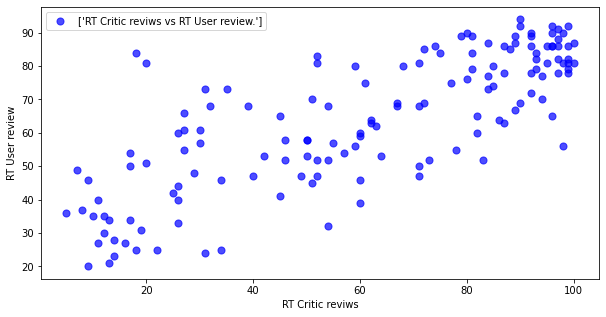

In [12]:
''' Create a scatterplot exploring the relationship between RT Critic reviws and RT User review. '''
plt.figure(figsize=(10,5))
plt.scatter(
    df_all_sites['RottenTomatoes'],df_all_sites['RottenTomatoes_User'],
    marker = 'o',
    color ='b',
    alpha = 0.7,
    s = 50,
    label = ["RT Critic reviws vs RT User review."]
)

plt.xlabel('RT Critic reviws')
plt.ylabel("RT User review")
plt.legend(loc = 'upper left')

axes = plt.gca()
plt.show()

In [27]:
''' Create a new column based off the difference between critics ratings and users ratings 
for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User.'''

df_all_sites['diff_RT_RT_User'] = df_all_sites['RottenTomatoes'] - df_all_sites['RottenTomatoes_User']
df_all_sites.head()


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_RT_RT_User
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [37]:
''' Calculate the Mean Absolute Difference between RT scores and RT User scores.'''
df_all_sites['diff_RT_RT_User'].abs().mean()

15.095890410958905

In [38]:
''' Plot the distribution of the differences between RT Critics Score and RT User Score.
There should be negative values in this distribution plot.'''
df_all_sites['diff_RT_RT_User'].value_counts()

 3     6
 2     6
-12    5
 21    5
 11    5
 9     5
-2     4
 14    4
-29    4
 6     4
-8     4
-3     4
-31    4
 17    4
 22    4
-14    4
 4     3
 0     3
-10    3
 24    3
-7     3
 1     3
-11    3
 7     3
-42    2
-1     2
-34    2
-18    2
 31    2
-17    2
-9     2
 5     2
-21    2
 20    2
-19    2
-37    2
 19    2
 13    2
 10    2
-16    1
-33    1
 15    1
 8     1
-38    1
-39    1
-20    1
 18    1
-66    1
-36    1
-6     1
 23    1
-61    1
-25    1
-28    1
-4     1
-13    1
-23    1
 42    1
-27    1
Name: diff_RT_RT_User, dtype: int64

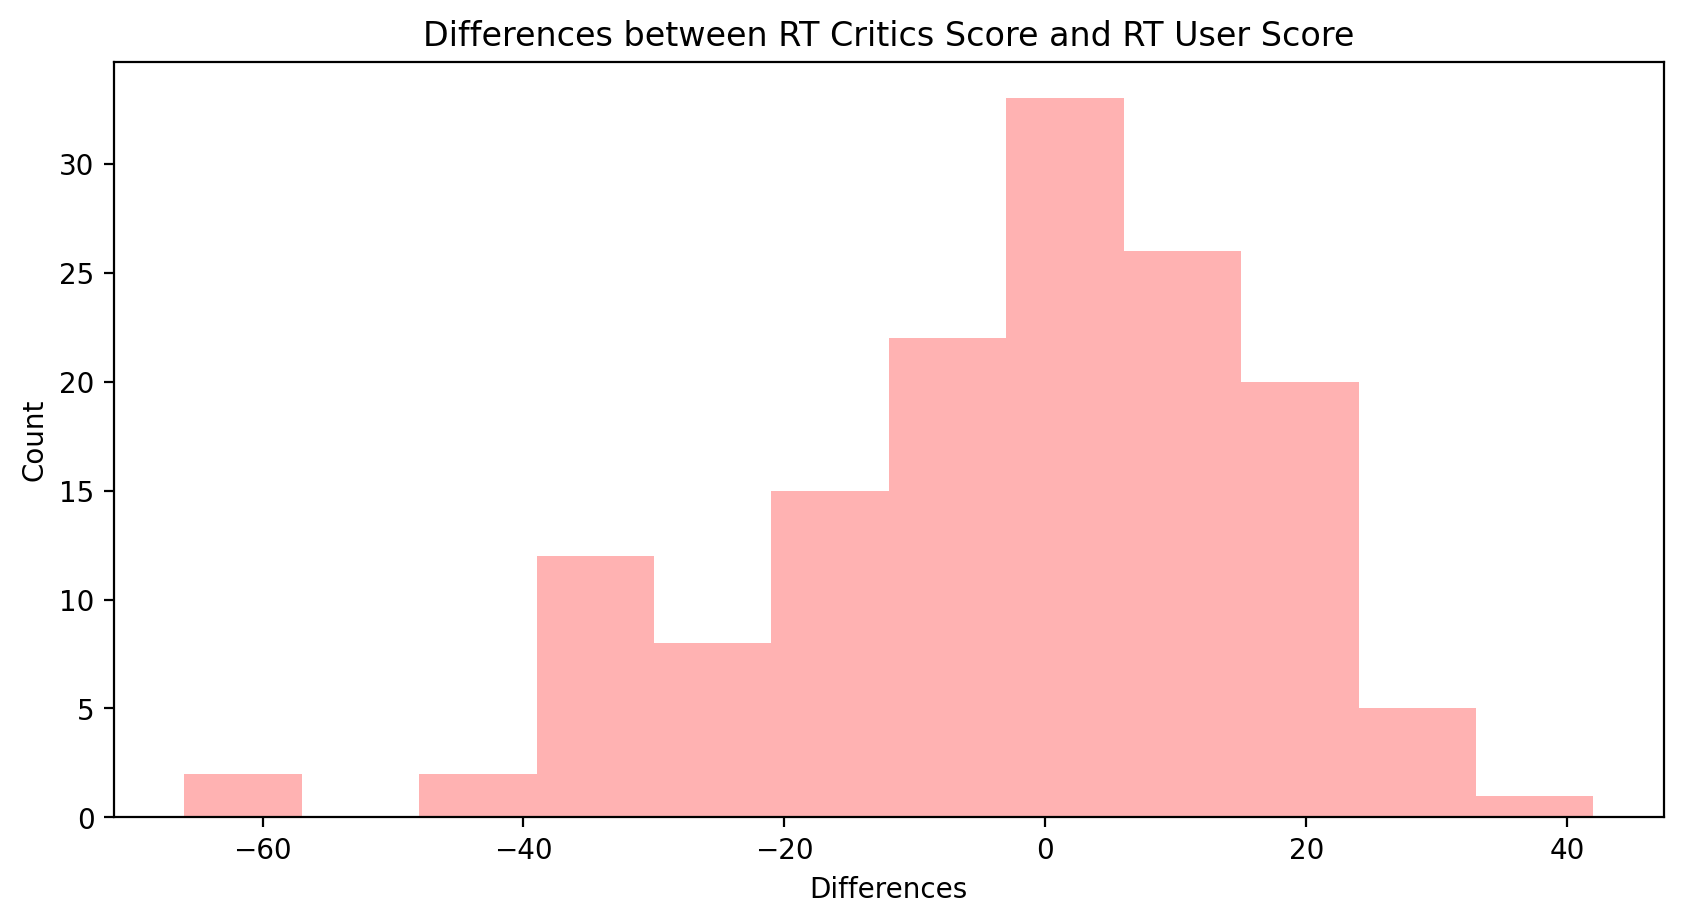

In [46]:
plt.figure(figsize=(10,5), dpi = 200)
plt.hist(
   df_all_sites['diff_RT_RT_User'],
   alpha = 0.3,
   color = 'red',
   bins = 'auto'
)

plt.title('Differences between RT Critics Score and RT User Score')
plt.xlabel('Differences')
plt.ylabel('Count')
plt.show()

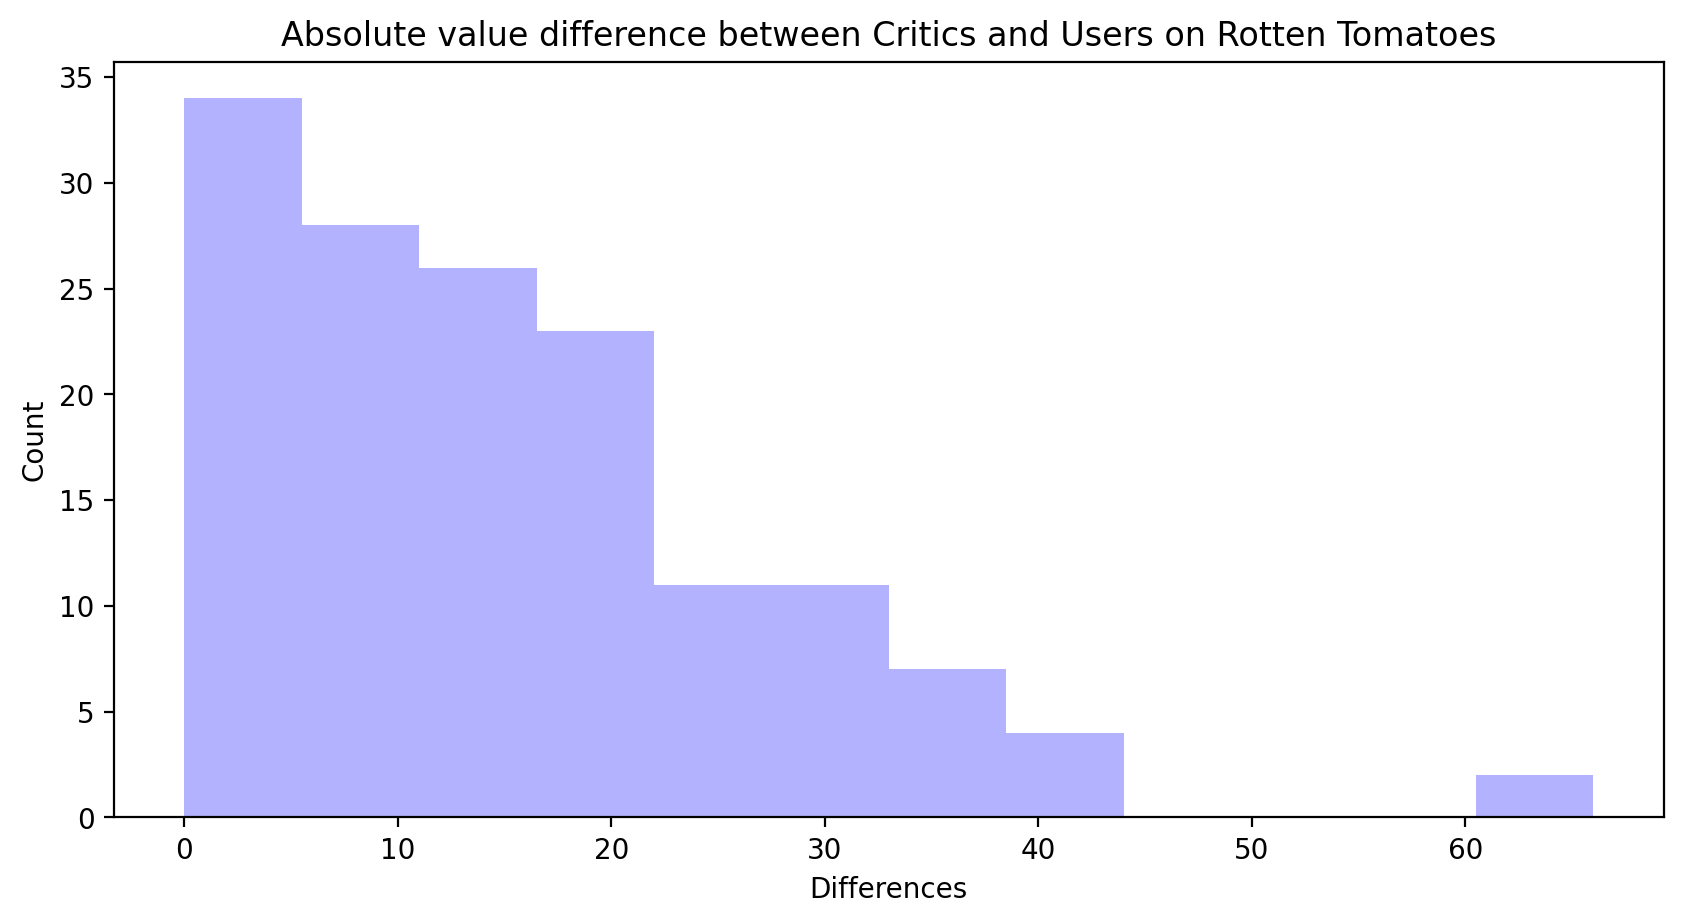

In [48]:
'''Now create a distribution showing the absolute value difference between Critics and Users on Rotten
Tomatoes.'''
plt.figure(figsize=(10,5), dpi = 200)
plt.hist(
   df_all_sites['diff_RT_RT_User'].abs(),
   alpha = 0.3,
   color = 'blue',
   bins = 'auto'
)

plt.title('Absolute value difference between Critics and Users on Rotten Tomatoes')
plt.xlabel('Differences')
plt.ylabel('Count')
plt.show()

In [71]:
''' What are the top 5 movies users rated higher than critics on average?'''
df_smallest = df_all_sites.nsmallest(5, 'diff_RT_RT_User', keep='all')
df_smallest[['FILM', 'diff_RT_RT_User']]

,FILM,diff_RT_RT_User
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [74]:
''' Now show the top 5 movies critics scores higher than users on average.'''
df_largest = df_all_sites.nlargest(5, 'diff_RT_RT_User', keep='all')
df_largest[['FILM', 'diff_RT_RT_User']]

,FILM,diff_RT_RT_User
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24
145,"Kumiko, The Treasure Hunter (2015)",24


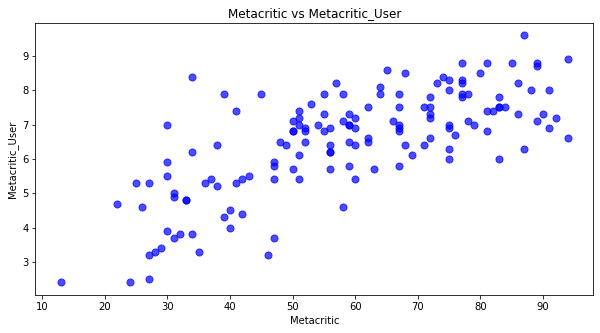

In [87]:
''' Display a scatterplot of the Metacritic Rating versus the MEtacritic User rating.'''
plt.figure(figsize=(10,5))
plt.scatter(
    df_all_sites['Metacritic'],df_all_sites['Metacritic_User'],
    marker = 'o',
    color ='b',
    alpha = 0.7,
    s = 50,
)

plt.xlabel('Metacritic')
plt.ylabel("Metacritic_User")
plt.title("Metacritic vs Metacritic_User")

axes = plt.gca()
plt.show()

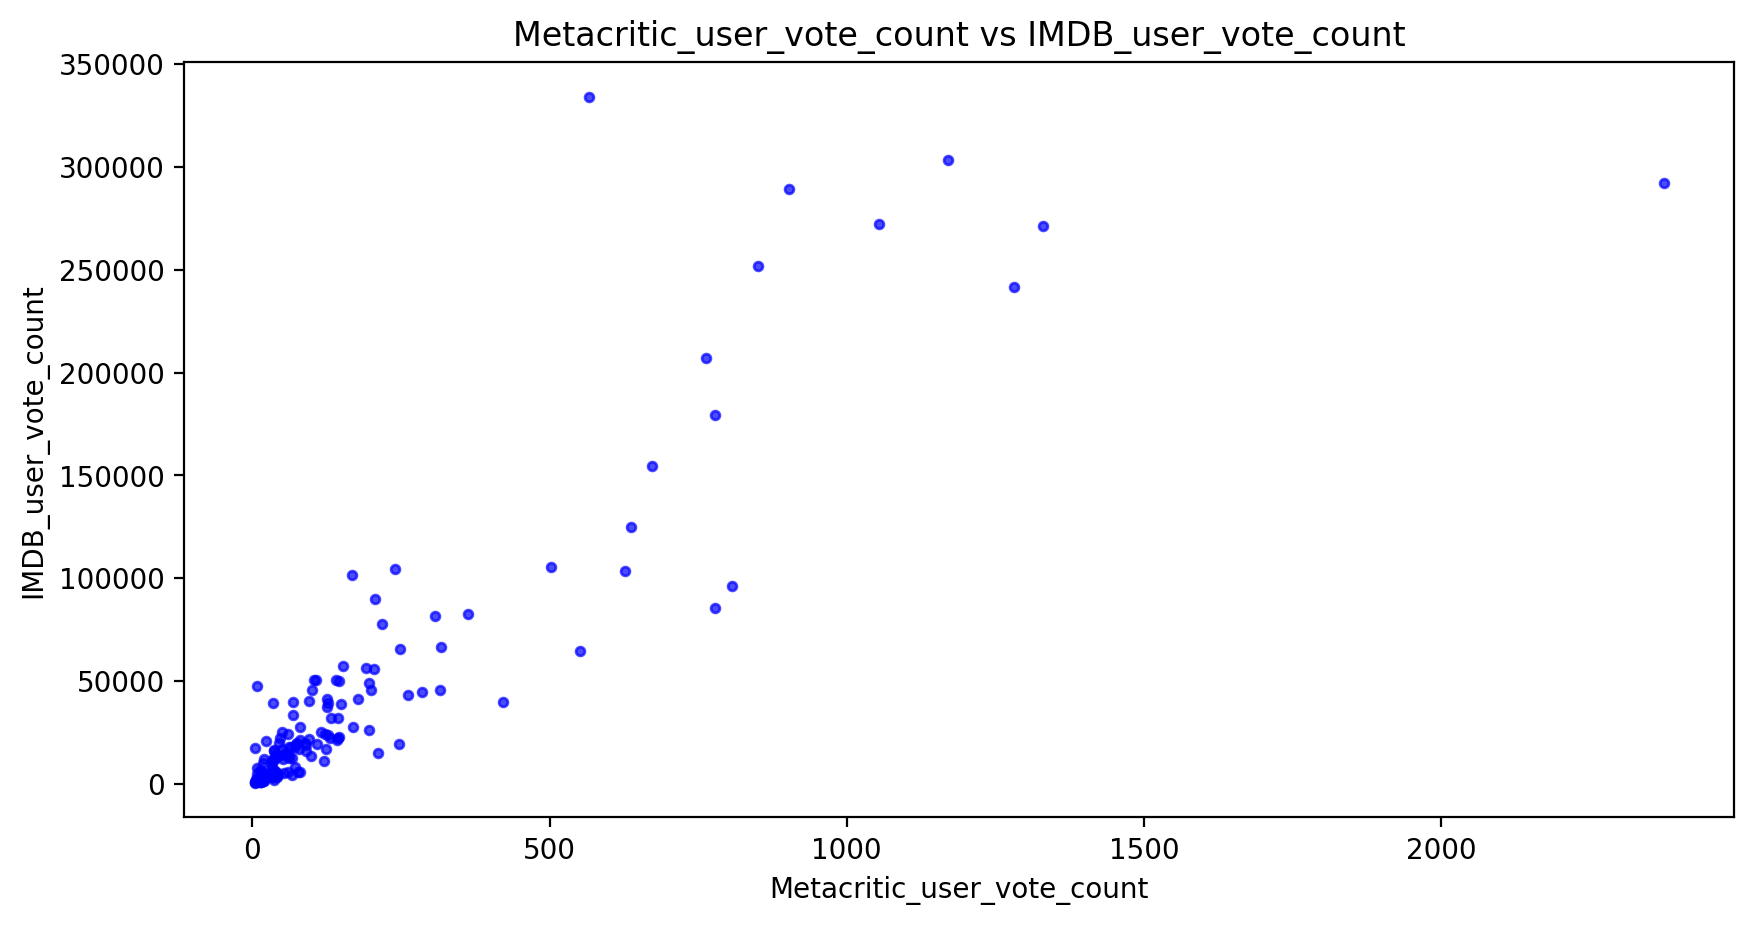

In [90]:
''' Create a scatterplot for the relationship between vote counts on MetaCritic
versus vote counts on IMDB.'''
plt.figure(figsize=(10,5), dpi = 200)
plt.scatter(
    df_all_sites['Metacritic_user_vote_count'],df_all_sites['IMDB_user_vote_count'],
    marker = 'o',
    color ='b',
    alpha = 0.7,
    s = 10,
)

plt.xlabel('Metacritic_user_vote_count')
plt.ylabel("IMDB_user_vote_count")
plt.title("Metacritic_user_vote_count vs IMDB_user_vote_count")
axes = plt.gca()
plt.show()


In [91]:
''' Botice there are two outliers here. The movie with the highest vote count on IMDB only has about 500
Metacritic ratings. What is this movie? What movie has the highest IMDB user vote count?'''
df_all_sites.nlargest(1, 'IMDB_user_vote_count', keep='all')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_RT_RT_User
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [92]:
''' What movie has the highest Metacritic User Vote count?'''
df_all_sites.nlargest(1, 'Metacritic_user_vote_count', keep='all')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_RT_RT_User
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [109]:
''' Combine the Fandago Table with the All Sites table. Not every movie in the Fandago table
is in the All Sites table, since some Fandago movie has very little ot no review. We only want
to compare movies that are in both Dataframes, so do an inner merge to merge together both DataFrames
based on the Film columns.'''
combine_df = pd.merge(left =  fandago, right = df_all_sites, how = 'inner', left_on = 'FILM', right_on = 'FILM')
combine_df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_RT_RT_User
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8


In [110]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   RottenTomatoes              145 non-null    int64  
 5   RottenTomatoes_User         145 non-null    int64  
 6   Metacritic                  145 non-null    int64  
 7   Metacritic_User             145 non-null    float64
 8   IMDB                        145 non-null    float64
 9   Metacritic_user_vote_count  145 non-null    int64  
 10  IMDB_user_vote_count        145 non-null    int64  
 11  diff_RT_RT_User             145 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 14.7+ KB


In [122]:
''' Normalize columns to Fandago STARS and RATINGS 0-5
Create new normalized columns for all ratings so they match up within the 0-5 range shown
on Fandago.'''
combine_df['RT_norm'] = combine_df['RottenTomatoes'].div(20).round(1)
combine_df['RT_User_norm'] = combine_df['RottenTomatoes_User'].div(20).round(1)
combine_df['MT_norm'] = combine_df['Metacritic'].div(20).round(1)
combine_df['MT_User_norm'] = combine_df['Metacritic_User'].div(2).round(1)
combine_df['IMDB_norm'] = combine_df['IMDB'].div(2).round(1)
combine_df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_RT_RT_User,RT_norm,RT_User_norm,MT_norm,MT_User_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [163]:
''' Now create a norm_scores DataFrame that only contains the normalizes ratings. Include
both STARS and RATING from the original Fandago table.'''
df_norm_scores = combine_df[['STARS', 'RATING', 'RT_norm', 'RT_User_norm', 'MT_norm', 'MT_User_norm', 'IMDB_norm' ]].copy()
df_norm_scores.head()

,STARS,RATING,RT_norm,RT_User_norm,MT_norm,MT_User_norm,IMDB_norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


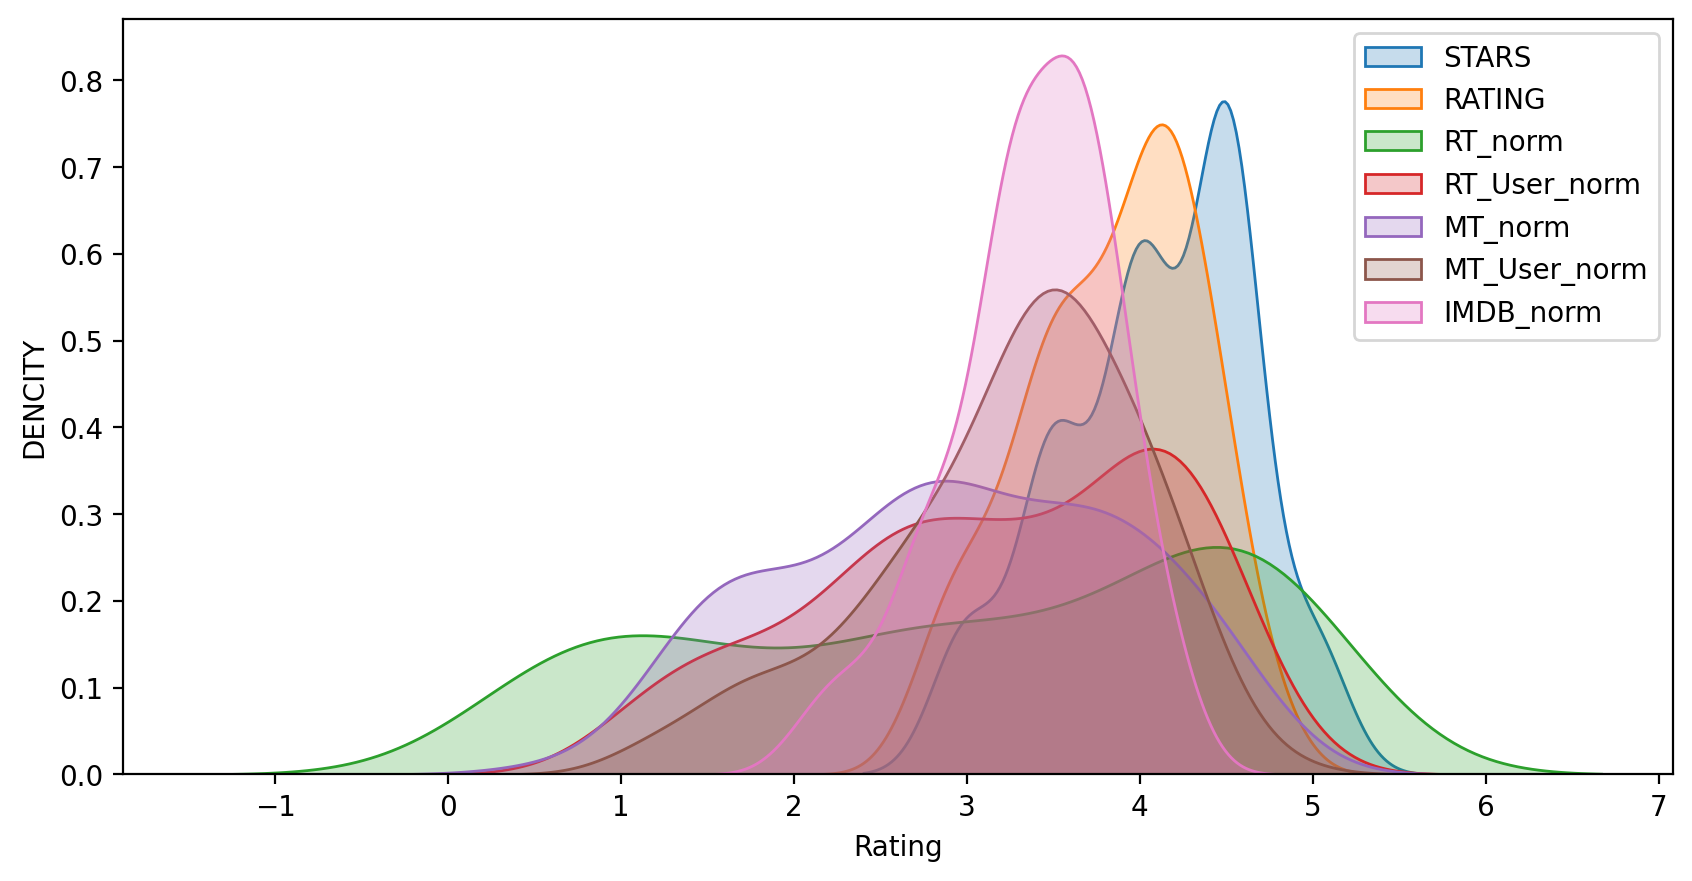

In [127]:
''' We already know Fandago pushs displayed RATING higher than STARS, but are the ratings themselves higher
than average? Create a plot comparing the distributions of normalized ratings across all sites.'''
plt.figure(figsize=(10,5), dpi = 200)
sns.kdeplot(
    data = df_norm_scores,
    x = 'STARS',
    shade = True,
    label = 'STARS'
)
 
sns.kdeplot(
    data = df_norm_scores,
    shade = True,
    x = 'RATING',
    label = 'RATING'
)
 
sns.kdeplot(
    data = df_norm_scores,
    shade = True,
    x = 'RT_norm',
    label = 'RT_norm'
)
 
sns.kdeplot(
    data = df_norm_scores,
    shade = True,
    x = 'RT_User_norm',
    label = 'RT_User_norm'
)
 
sns.kdeplot(
    data = df_norm_scores,
    shade = True,
    x = 'MT_norm',
    label = 'MT_norm'
)

sns.kdeplot(
    data = df_norm_scores,
    shade = True,
    x = 'MT_User_norm',
    label = 'MT_User_norm'
)

sns.kdeplot(
    data = df_norm_scores,
    shade = True,
    x = 'IMDB_norm',
    label = 'IMDB_norm'
)
 
plt.xlabel('Rating')
plt.ylabel('DENCITY')
plt.legend(loc = 'best')
plt.show()

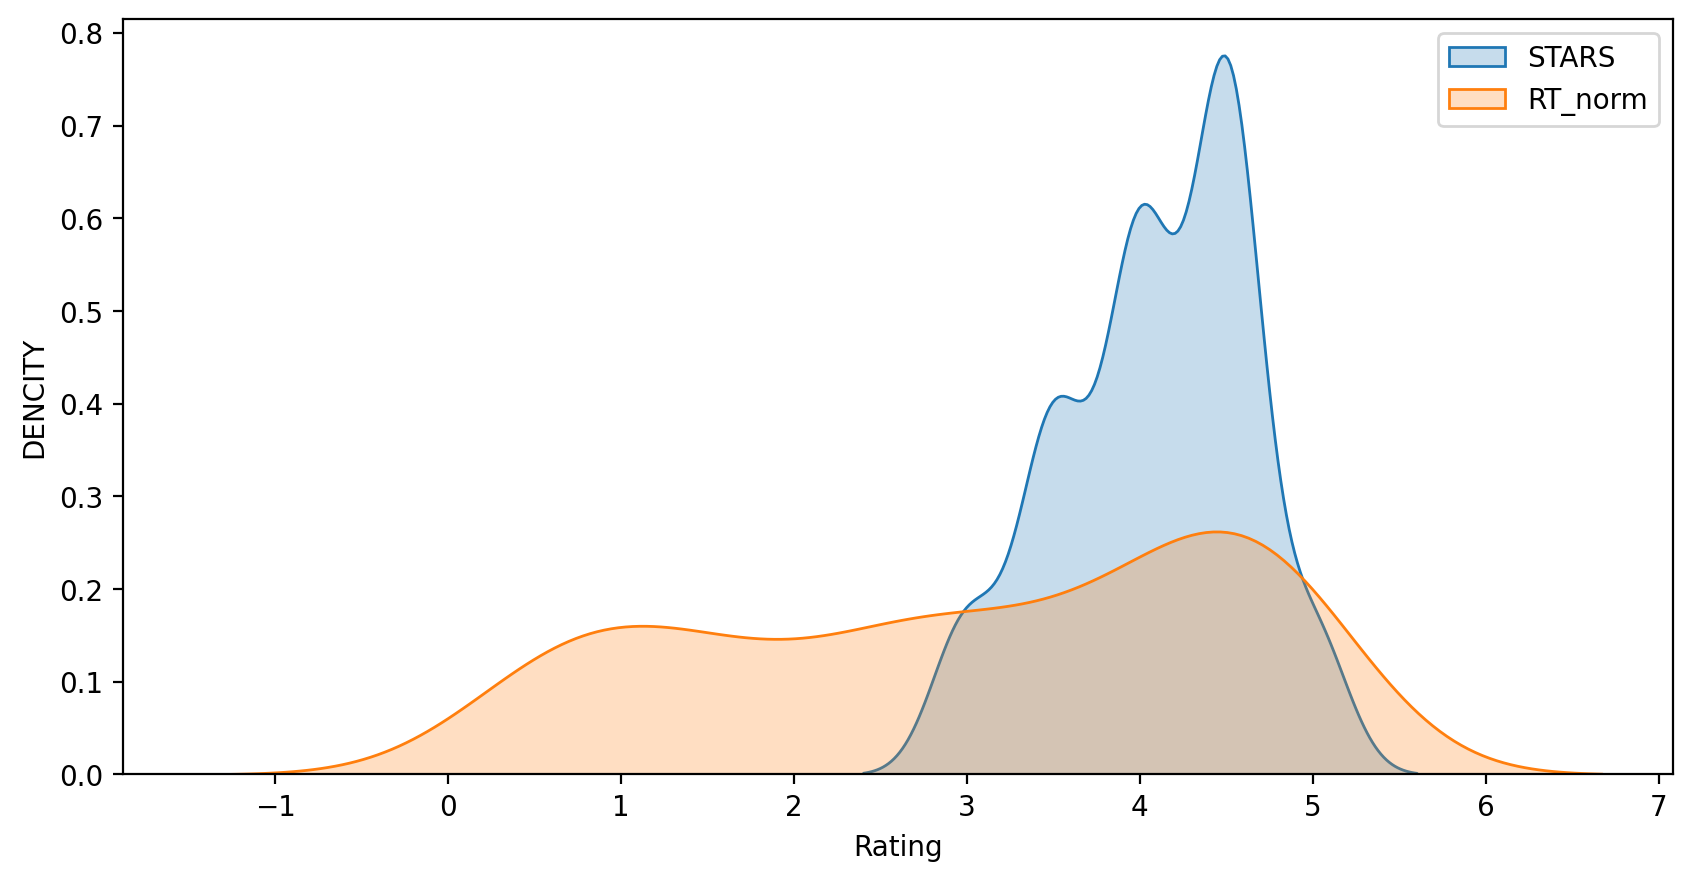

In [135]:
''' Clearly Fandago has an uneven distribution. We can also see that RT critics have the most uniform
distribution. Let's directly compare these two. '''
plt.figure(figsize=(10,5), dpi = 200)
sns.kdeplot(
    data = df_norm_scores,
    x = 'STARS',
    shade = True,
    label = 'STARS'
)

sns.kdeplot(
    data = df_norm_scores,
    shade = True,
    x = 'RT_norm',
    label = 'RT_norm'
)

plt.xlabel('Rating')
plt.ylabel('DENCITY')
plt.legend(loc = 'best')
plt.show()

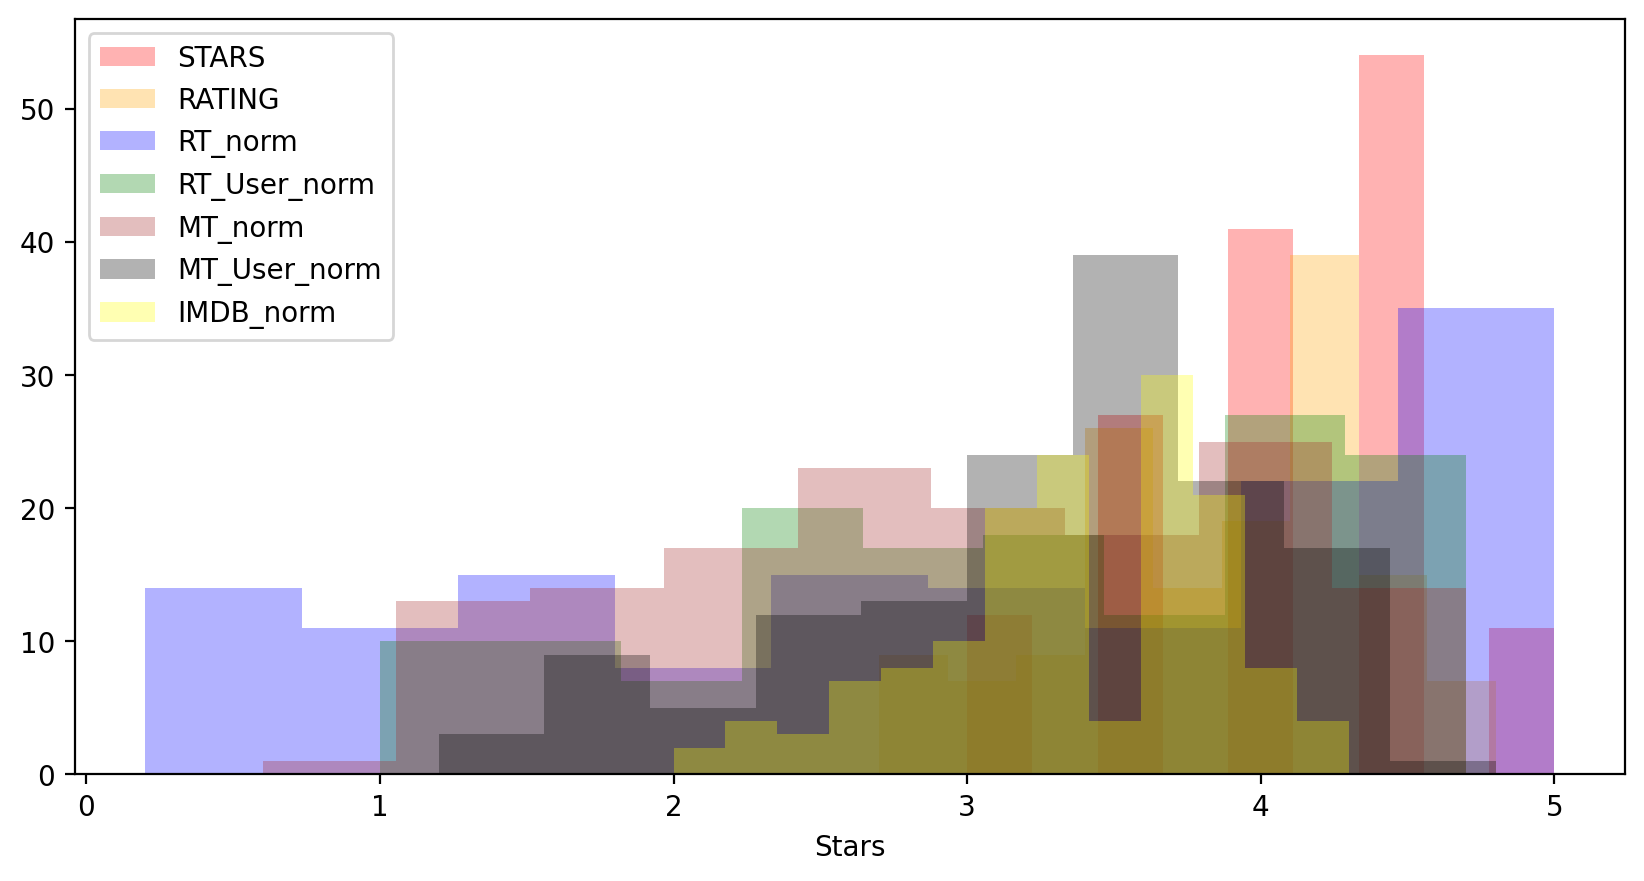

In [162]:
''' Create a hist plot comparing all normalized scores.'''
plt.figure(figsize=(10,5), dpi = 200)
plt.hist(
   df_norm_scores['STARS'],
   alpha = 0.3,
   color = 'red',
   label = 'STARS',
   bins = 'auto'
)
plt.hist(
   df_norm_scores['RATING'],
   alpha = 0.3,
   color = 'orange',
   label = 'RATING',
   bins = 'auto'
)
plt.hist(
   df_norm_scores['RT_norm'],
   alpha = 0.3,
   color = 'blue',
   label = 'RT_norm',
   bins = 'auto'
)
plt.hist(
   df_norm_scores['RT_User_norm'],
   alpha = 0.3,
   color = 'green',
   label = 'RT_User_norm',
   bins = 'auto'
)
plt.hist(
   df_norm_scores['MT_norm'],
   alpha = 0.3,
   color = 'brown',
   label = 'MT_norm',
   bins = 'auto'
)
plt.hist(
   df_norm_scores['MT_User_norm'],
   alpha = 0.3,
   color = 'black',
   label = 'MT_User_norm',
   bins = 'auto'
)
plt.hist(
   df_norm_scores['IMDB_norm'],
   alpha = 0.3,
   color = 'yellow',
   label = 'IMDB_norm',
   bins = 'auto'
)

plt.xlabel('Stars')
plt.legend(loc = 'best')
plt.show()

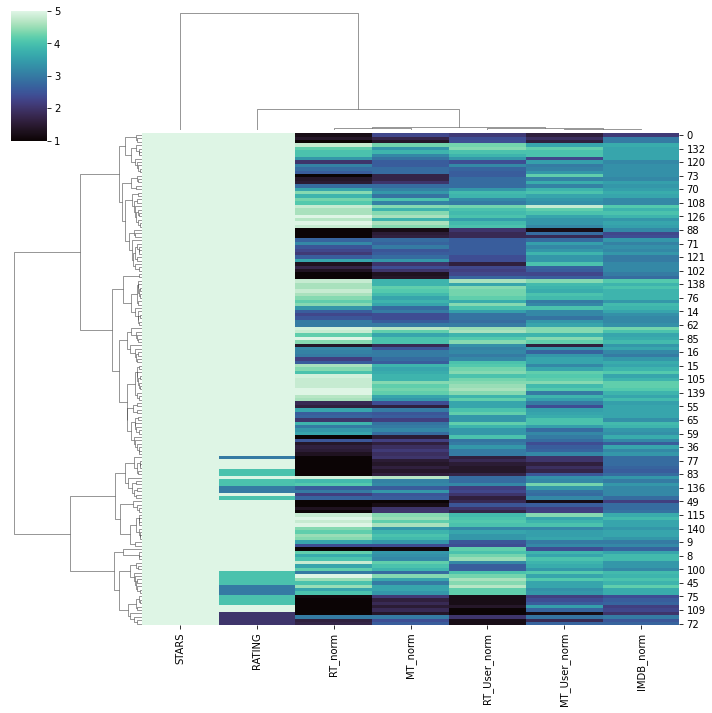

In [205]:
''' How are the worst movies rated across all platforms?
Create a clustermap visualiaztion of all normalized scores. Note the differences in ratings,
highly rated movies should be clustered together versus poorly rated movies. Note: this clustermap
does need to have the Film titles as the index, feel free to drop it for the clustermap.'''
g = sns.clustermap(df_norm_scores, cmap="mako", vmin=1, vmax=5)

In [213]:
''' Clearly Fandago is rating movies much higher than other sites, especially considering
that it is then displaying a rounded up version of the rating.
Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are
the top 10 lowest rated movies? What are the normalized scored across all platforms for these
movies?'''
df_norm_scores = combine_df[['FILM','STARS', 'RATING', 'RT_norm', 'RT_User_norm', 'MT_norm', 'MT_User_norm', 'IMDB_norm' ]].copy()
df_norm_scores.head()

,FILM,STARS,RATING,RT_norm,RT_User_norm,MT_norm,MT_User_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [221]:
''' The top 10 worst movies. '''
worst_movies = df_norm_scores.nsmallest(10, 'RT_norm', keep='all')
worst_movies.head()

,FILM,STARS,RATING,RT_norm,RT_User_norm,MT_norm,MT_User_norm,IMDB_norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0


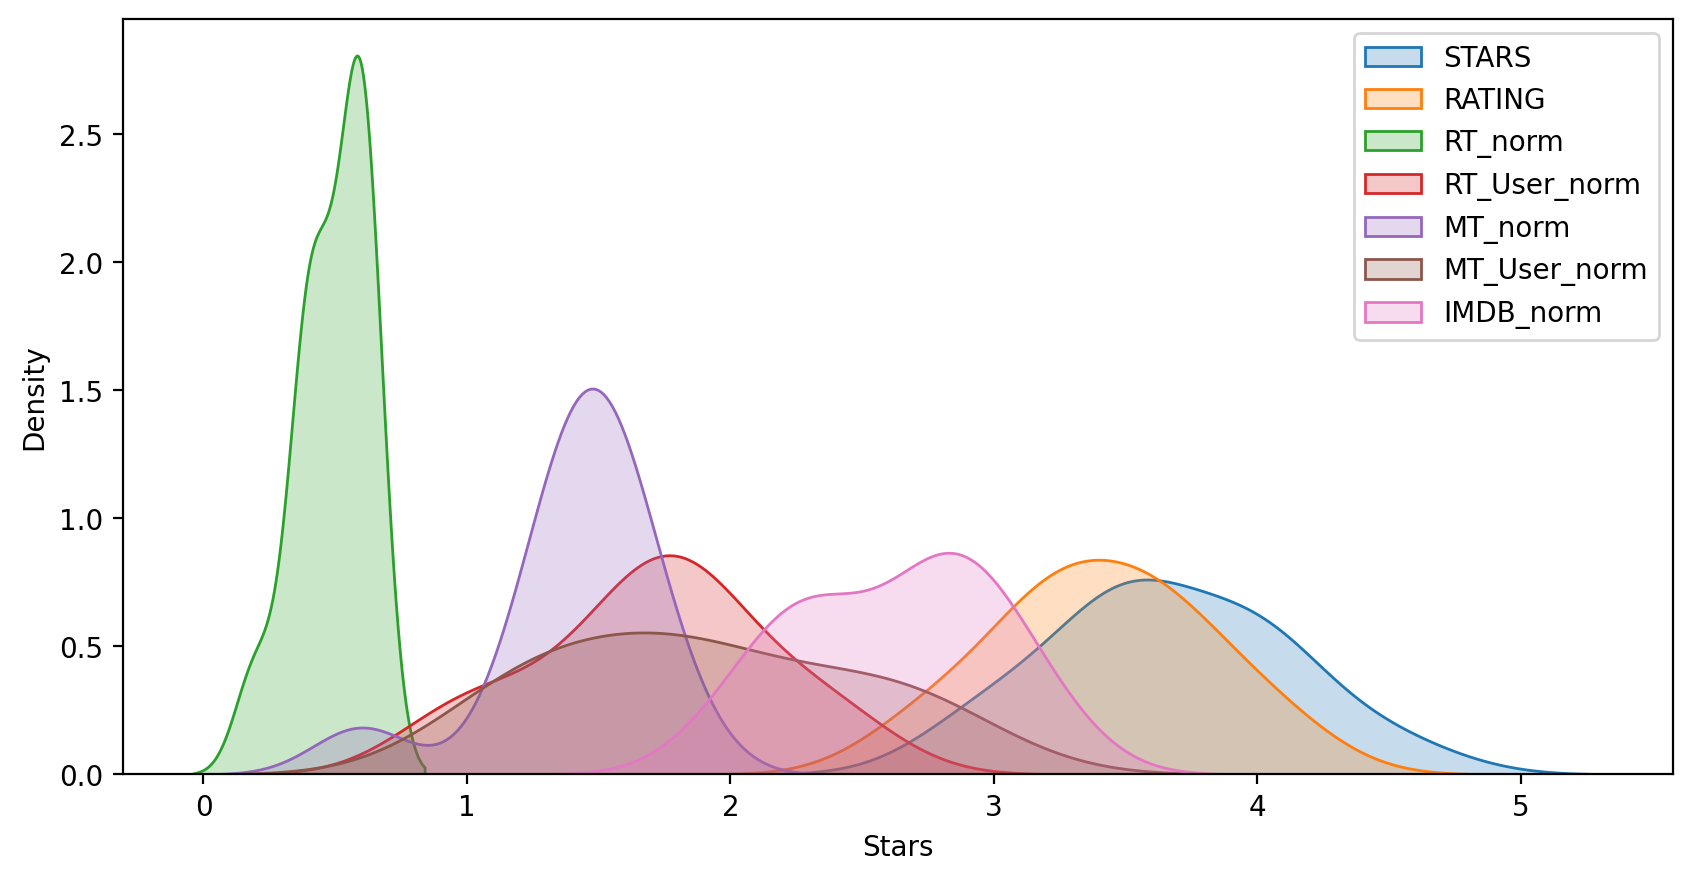

In [231]:
''' Visualize the distribution of ratings across all sites for the top 10 worst movies.'''
plt.figure(figsize=(10,5), dpi = 200)
sns.kdeplot(
    data = worst_movies,
    x = 'STARS',
    shade = True,
    label = 'STARS'
)
sns.kdeplot(
    data = worst_movies,
    x = 'RATING',
    shade = True,
    label = 'RATING'
)
sns.kdeplot(
    data = worst_movies,
    x = 'RT_norm',
    shade = True,
    label = 'RT_norm'
)
sns.kdeplot(
    data = worst_movies,
    x = 'RT_User_norm',
    shade = True,
    label = 'RT_User_norm'
)
sns.kdeplot(
    data = worst_movies,
    x = 'MT_norm',
    shade = True,
    label = 'MT_norm'
)
sns.kdeplot(
    data = worst_movies,
    x = 'MT_User_norm',
    shade = True,
    label = 'MT_User_norm'
)
sns.kdeplot(
    data = worst_movies,
    x = 'IMDB_norm',
    shade = True,
    label = 'IMDB_norm'
)

plt.xlabel('Stars')
plt.legend(loc = 'best')
plt.show()

In [237]:
    ''' Wow! Fandago is showing aroud 3-4 star ratings for films that are clearly bad!
    Fandago is displaying 4.5 stars on their site for a film with an average rating of 1.86
    across the other platforms!'''
    worst_movies.loc[worst_movies['FILM'] =='Taken 3 (2015)']

,FILM,STARS,RATING,RT_norm,RT_User_norm,MT_norm,MT_User_norm,IMDB_norm
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0


In [238]:
(0.4+2.3+1.3+2.3+3) / 5 

1.86